In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bmw = pd.read_csv('bmw.csv')
bmw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
### Distribution of Price

<Axes: xlabel='price', ylabel='Count'>

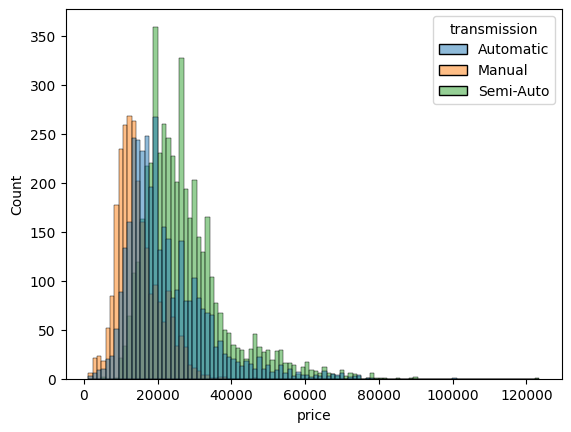

In [9]:
sns.histplot(x='price', data=bmw,hue='transmission')

<Axes: xlabel='price'>

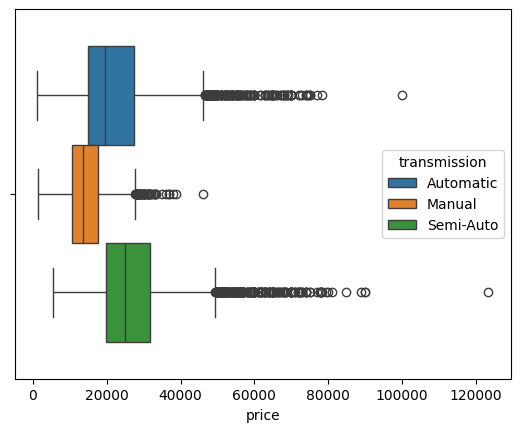

In [7]:
sns.boxplot(x='price', data=bmw,hue='transmission')

In [10]:
### Distribution of Mileage

<Axes: xlabel='mileage', ylabel='Count'>

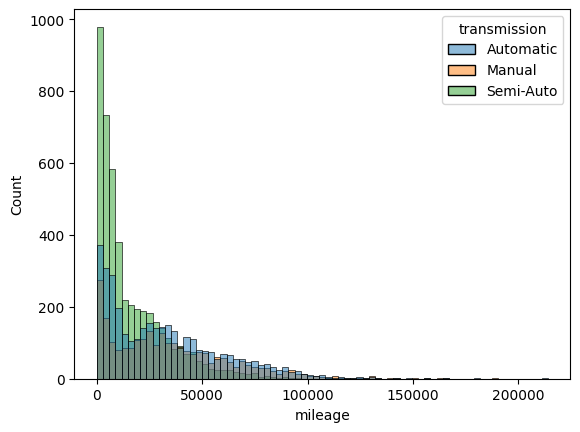

In [12]:
sns.histplot(x='mileage', data=bmw,hue='transmission')

<Axes: xlabel='mileage'>

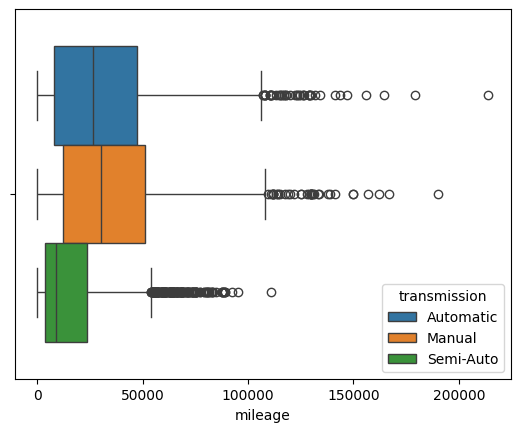

In [14]:
sns.boxplot(x='mileage', data=bmw,hue='transmission')

In [ ]:
### Distribution of MPG (L/100km)

<Axes: xlabel='mpg', ylabel='Count'>

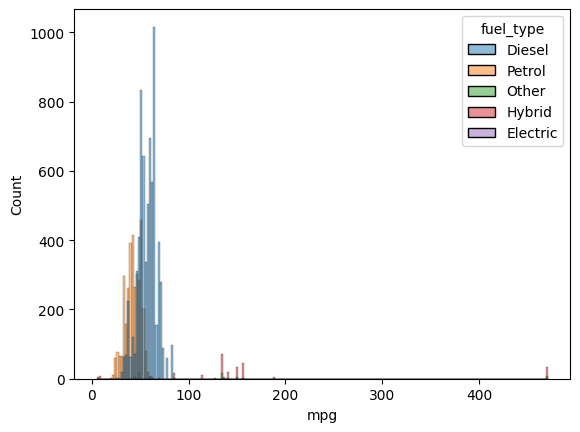

In [18]:
sns.histplot(x='mpg', data=bmw,hue='fuel_type')

<Axes: xlabel='mpg'>

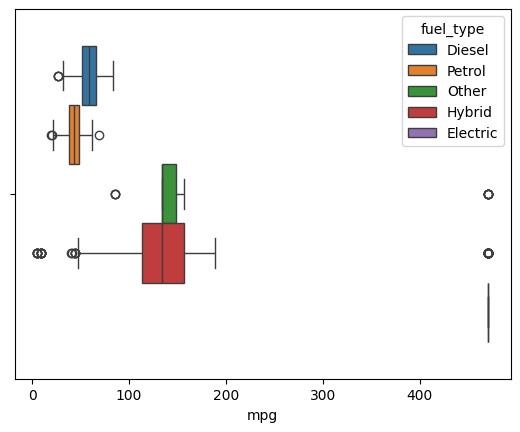

In [19]:
sns.boxplot(x='mpg', data=bmw,hue='fuel_type')

In [20]:
# Compare MGS vs Price

<Axes: xlabel='mpg', ylabel='price'>

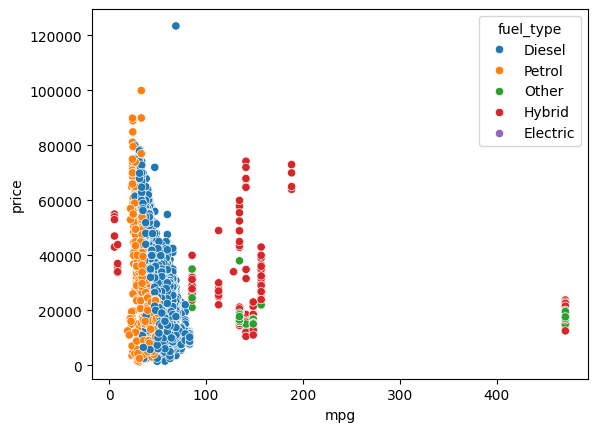

In [23]:
sns.scatterplot(y='price', x='mpg', data=bmw,hue='fuel_type')

<Axes: xlabel='mileage', ylabel='price'>

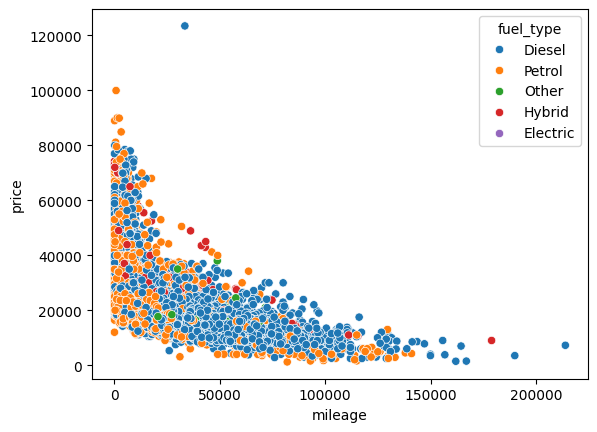

In [24]:
sns.scatterplot(y='price', x='mileage', data=bmw,hue='fuel_type')

<Axes: xlabel='mileage', ylabel='price'>

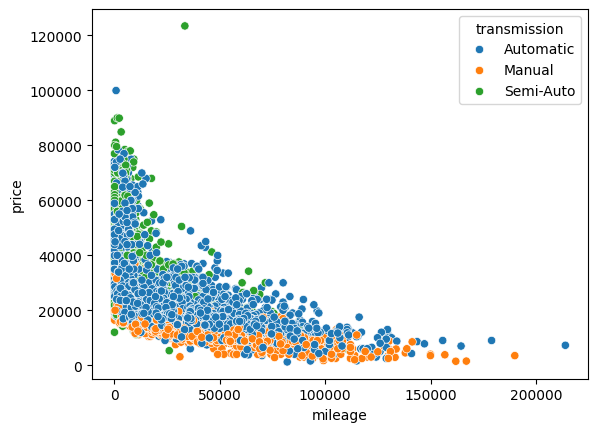

In [25]:
sns.scatterplot(y='price', x='mileage', data=bmw,hue='transmission')

<Axes: xlabel='price', ylabel='year'>

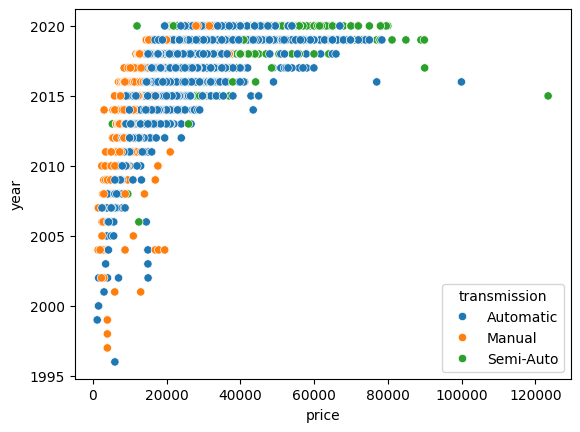

In [27]:
sns.scatterplot(x='price', y='year', data=bmw,hue='transmission')

In [1]:
# Corr Analysis

                year     price   mileage       tax       mpg  engineSize
year        1.000000  0.623756 -0.774382  0.025200 -0.071762   -0.026337
price       0.623756  1.000000 -0.605397  0.263484 -0.204882    0.460196
mileage    -0.774382 -0.605397  1.000000 -0.170747  0.118609   -0.002540
tax         0.025200  0.263484 -0.170747  1.000000 -0.351798    0.429616
mpg        -0.071762 -0.204882  0.118609 -0.351798  1.000000   -0.399844
engineSize -0.026337  0.460196 -0.002540  0.429616 -0.399844    1.000000


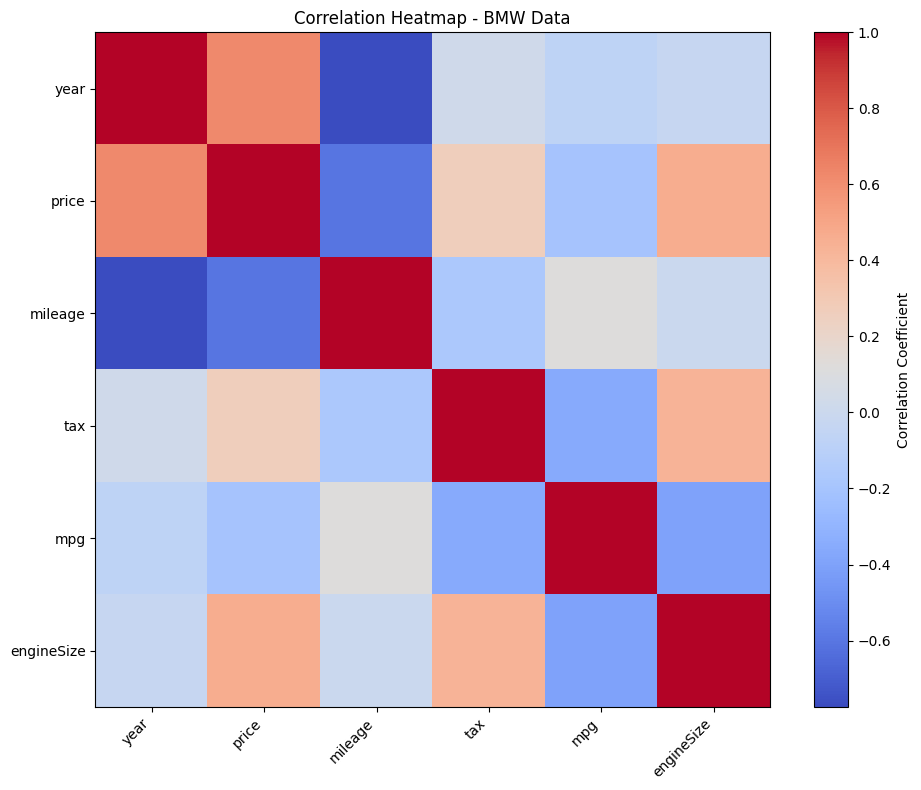

In [4]:
# Perform correlation analysis (numeric columns only)
correlation_matrix = bmw.corr(numeric_only=True)

# Display correlation table
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap - BMW Data')
plt.tight_layout()
plt.show()

In [7]:
## Predict Car Price

In [9]:
# predict_bmw_price.py

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# -----------------------------------------------------
# 1. Load dataset
# -----------------------------------------------------
df = pd.read_csv("bmw.csv")

# Display basic info
print("Dataset shape:", df.shape)
print(df.head(), "\n")

# -----------------------------------------------------
# 2. Define features (X) and target (y)
# -----------------------------------------------------
# Use numeric columns for regression
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

X = df[features]
y = df[target]

# -----------------------------------------------------
# 3. Split data into training and test sets
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 4. Create and train the model
# -----------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -----------------------------------------------------
# 5. Evaluate model performance
# -----------------------------------------------------
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")

# -----------------------------------------------------
# 6. Example prediction
# -----------------------------------------------------
example = pd.DataFrame({
    'year': [2020],
    'mileage': [15000],
    'tax': [150],
    'mpg': [45],
    'engineSize': [2.0]
})

predicted_price = model.predict(example)[0]
print(f"\nPredicted Price for Example Car: £{predicted_price:,.2f}")


Dataset shape: (10781, 9)
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0   

Model Performance:
  MAE : 4630.71
  RMSE: 6801.83
  R²  : 0.642

Predicted Price for Example Car: £28,152.09


Dataset shape: (10781, 9)
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0   

Model Performance:
  MAE : 2322.68
  RMSE: 3713.30
  R²  : 0.893

Predicted Price for Example Car: £33,021.11


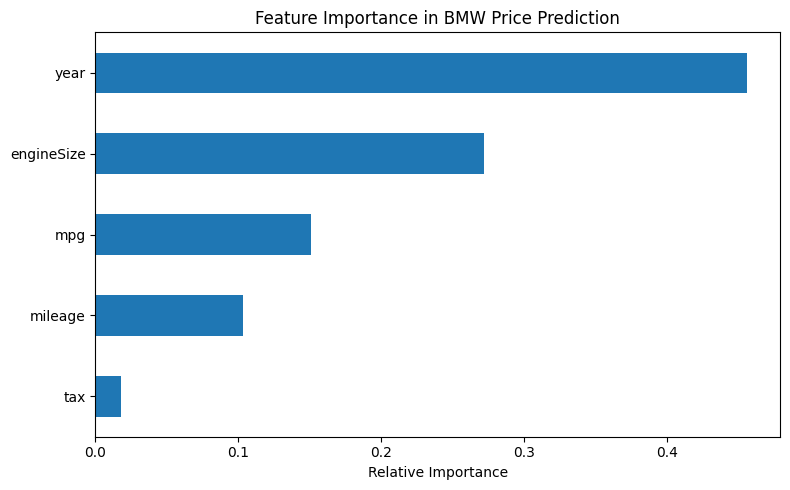

In [10]:
# predict_bmw_price_rf.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# -----------------------------------------------------
# 1. Load dataset
# -----------------------------------------------------
df = bmw

# Optional: show quick preview
print("Dataset shape:", df.shape)
print(df.head(), "\n")

# -----------------------------------------------------
# 2. Select features (X) and target (y)
# -----------------------------------------------------
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

X = df[features]
y = df[target]

# -----------------------------------------------------
# 3. Split data into training and test sets
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 4. Train Random Forest Regressor
# -----------------------------------------------------
model = RandomForestRegressor(
    n_estimators=200,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
model.fit(X_train, y_train)

# -----------------------------------------------------
# 5. Make predictions
# -----------------------------------------------------
y_pred = model.predict(X_test)

# -----------------------------------------------------
# 6. Evaluate model performance
# -----------------------------------------------------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")

# -----------------------------------------------------
# 7. Example prediction
# -----------------------------------------------------
example = pd.DataFrame({
    'year': [2020],
    'mileage': [15000],
    'tax': [150],
    'mpg': [45],
    'engineSize': [2.0]
})

predicted_price = model.predict(example)[0]
print(f"\nPredicted Price for Example Car: £{predicted_price:,.2f}")

# -----------------------------------------------------
# 8. (Optional) Feature Importance
# -----------------------------------------------------
import matplotlib.pyplot as plt

importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8, 5))
importance.plot(kind='barh')
plt.title("Feature Importance in BMW Price Prediction")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


Dataset shape: (10781, 9)
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0   

Running grid search... (this may take a few minutes)
Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_es

/home/davidj/Github/auto_bmw/.venv/lib/python3.14/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None,

/home/davidj/Github/auto_bmw/.venv/lib/python3.14/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "/home/davidj/Github/auto_bmw/.venv/lib/python3.14/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/davidj/Github/auto_bmw/.venv/lib/python3.14/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/home/davidj/Github/auto_bmw/.


Best Parameters Found:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Tuned Model Performance:
  MAE : 2316.16
  RMSE: 3706.71
  R²  : 0.894

Predicted Price for Example Car: £27,152.75


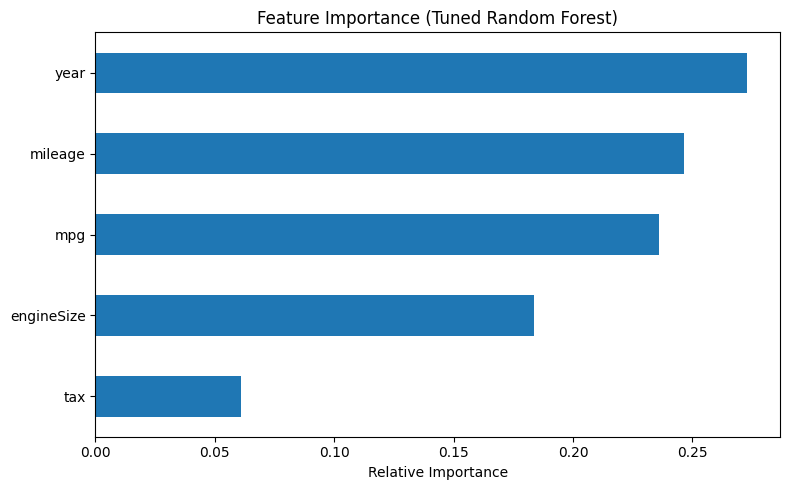

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   3.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   3.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   2.8s
[CV] END max_depth=20, max_features=sq

In [11]:
# predict_bmw_price_rf_tuned.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------------------------------
# 1. Load dataset
# -----------------------------------------------------
df = bmw

print("Dataset shape:", df.shape)
print(df.head(), "\n")

# -----------------------------------------------------
# 2. Define features and target
# -----------------------------------------------------
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
target = 'price'

X = df[features]
y = df[target]

# -----------------------------------------------------
# 3. Train-test split
# -----------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------------------------
# 4. Grid search for hyperparameter tuning
# -----------------------------------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                # 3-fold cross-validation
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

print("Running grid search... (this may take a few minutes)")
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("\nBest Parameters Found:")
print(grid_search.best_params_)

# -----------------------------------------------------
# 5. Evaluate tuned model
# -----------------------------------------------------
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nTuned Model Performance:")
print(f"  MAE : {mae:.2f}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R²  : {r2:.3f}")

# -----------------------------------------------------
# 6. Example prediction
# -----------------------------------------------------
example = pd.DataFrame({
    'year': [2020],
    'mileage': [15000],
    'tax': [150],
    'mpg': [45],
    'engineSize': [2.0]
})

predicted_price = best_model.predict(example)[0]
print(f"\nPredicted Price for Example Car: £{predicted_price:,.2f}")

# -----------------------------------------------------
# 7. Feature importance visualization
# -----------------------------------------------------
importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
importance.plot(kind='barh')
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


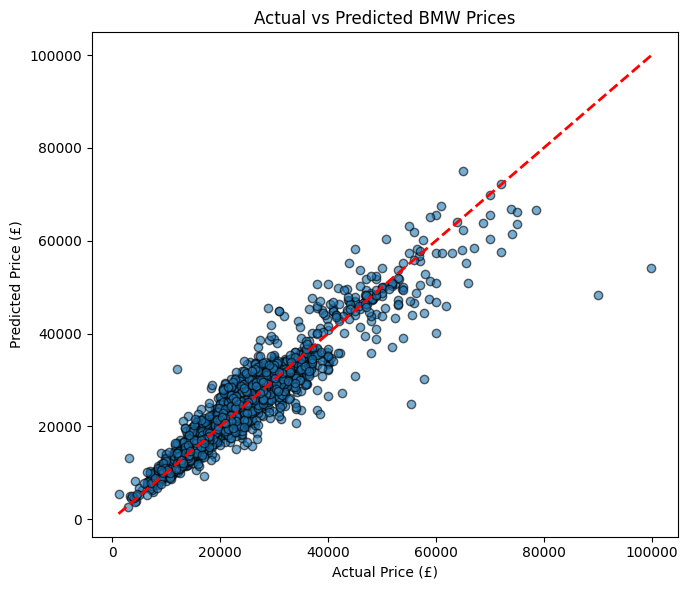

In [12]:
# -----------------------------------------------------
# 8. Plot Actual vs Predicted Prices
# -----------------------------------------------------
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price (£)")
plt.ylabel("Predicted Price (£)")
plt.title("Actual vs Predicted BMW Prices")
plt.tight_layout()
plt.show()


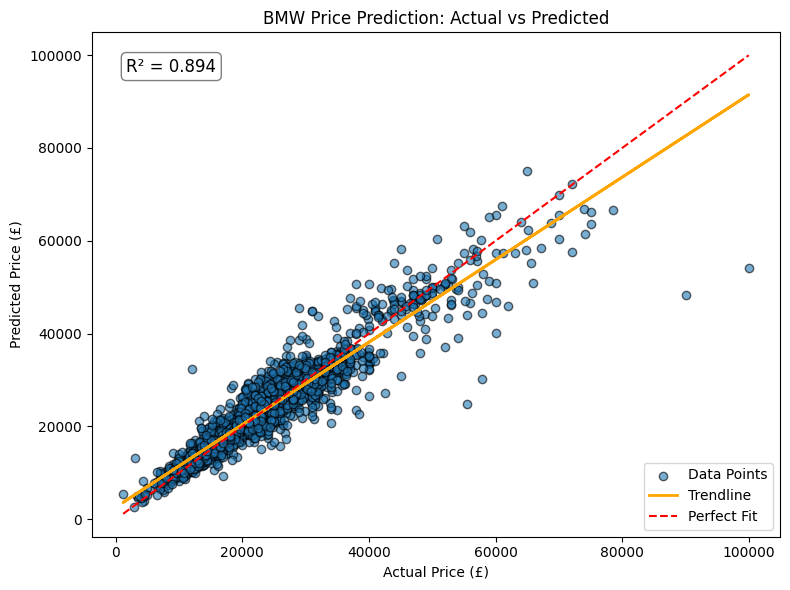

In [13]:
# -----------------------------------------------------
# 8. Plot Actual vs Predicted Prices with Trendline & R²
# -----------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape for linear regression fit
y_test_reshaped = np.array(y_test).reshape(-1, 1)
y_pred_reshaped = np.array(y_pred).reshape(-1, 1)

# Fit regression line
trend_model = LinearRegression()
trend_model.fit(y_test_reshaped, y_pred_reshaped)
y_line = trend_model.predict(y_test_reshaped)

# Get R² for the trendline
r2_line = trend_model.score(y_test_reshaped, y_pred_reshaped)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', label='Data Points')
plt.plot(y_test, y_line, color='orange', linewidth=2, label='Trendline')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=1.5, label='Perfect Fit')

plt.xlabel("Actual Price (£)")
plt.ylabel("Predicted Price (£)")
plt.title("BMW Price Prediction: Actual vs Predicted")

# R² annotation in corner
plt.text(
    0.05, 0.95,
    f"R² = {r2_line:.3f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1)
)

plt.legend()
plt.tight_layout()
plt.show()
